## Customer Attrition Prediction with Machine Learning and Deep Learning

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df = pd.read_csv('dataset/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Get the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Manipulation

In [8]:
# Extract the 5th column & store it in ‘customer_5’
customer_5 = df[4:5]
customer_5

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [9]:
# Extract the 15th column & store it in ‘customer_15’
customer_15 = df[15:16]
customer_15

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [ ]:
# Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [11]:
# Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [12]:
#Extract all the customers whose Contract is of two years, payment method is Mailed 
# check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [13]:
# Extract 333 random records from the customer_churndataframe& store the result in ‘customer_333’
customer_333 = df.sample(n=333, random_state=42)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,6890-PFRQX,Male,0,No,No,18,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,69.50,1199.4,No
3601,1552-CZCLL,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.00,1087.25,No
2149,2014-MKGMH,Female,0,No,No,46,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,101.10,4674.4,No
5141,0303-WMMRN,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,86.05,No


In [14]:
# Get the count of different levels from the ‘Churn’ column
churn_counts = df['Churn'].value_counts()
churn_counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data Visualization

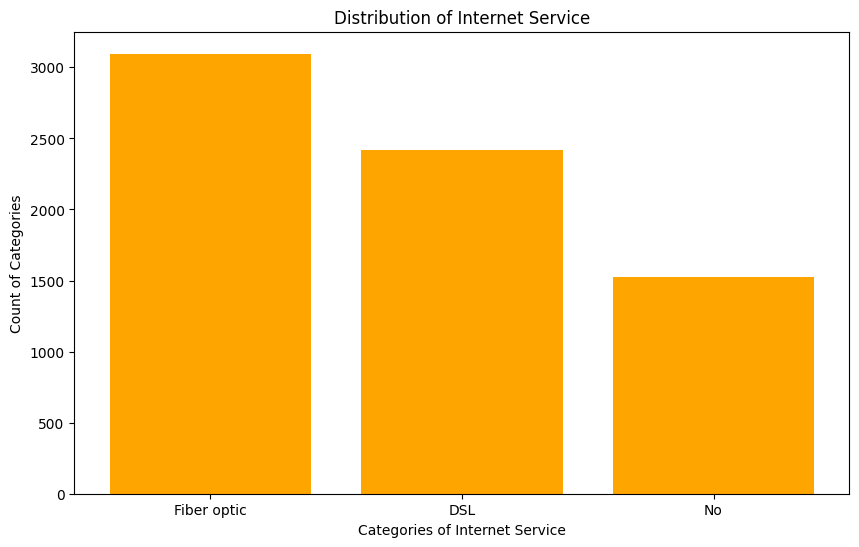

In [15]:
# Count the occurrences of each category
service_counts = df['InternetService'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(service_counts.index, service_counts.values, color='orange')

# Set the x-axis label
plt.xlabel('Categories of Internet Service')

# Set the y-axis label
plt.ylabel('Count of Categories')

# Set the title of the plot
plt.title('Distribution of Internet Service')

# Show the plot
plt.show()

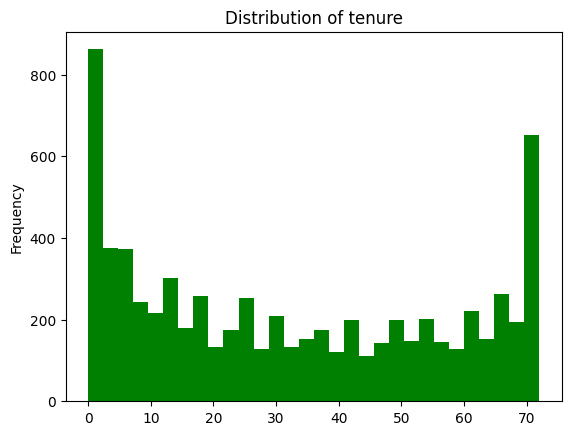

In [16]:
# Create the histogram
df['tenure'].plot.hist(bins=30, color='green')

# Set the title of the plot
plt.title('Distribution of tenure')

# Display the plot
plt.show()

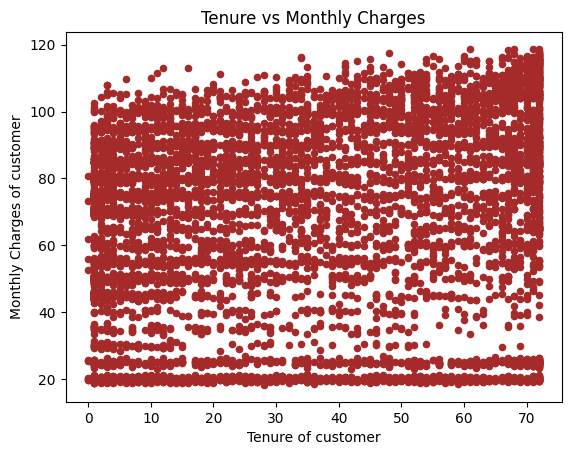

In [17]:
# Create the scatter plot
df.plot.scatter(x='tenure', y='MonthlyCharges', color='brown')

# Set the x-axis label
plt.xlabel('Tenure of customer')

# Set the y-axis label
plt.ylabel('Monthly Charges of customer')

# Set the title of the plot
plt.title('Tenure vs Monthly Charges')

# Display the plot
plt.show()

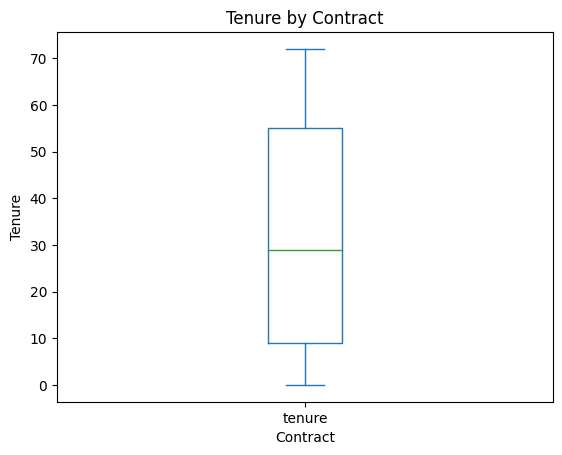

In [18]:

# Create the box plot
df.plot.box(x='Contract', y='tenure')

# Set the x-axis label
plt.xlabel('Contract')

# Set the y-axis label
plt.ylabel('Tenure')

# Set the title of the plot
plt.title('Tenure by Contract')

# Display the plot
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (70:30 ratio)
X = df[['tenure']]
y = df['MonthlyCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set  
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear_Regression Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Linear_Regression Root Mean Squared Error:", rmse)

error_in_linear_model = y_test - y_pred



Linear_Regression Mean Squared Error: 845.6091871095867
Linear_Regression Root Mean Squared Error: 29.07936015646814


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['MonthlyCharges'], df['Churn'], test_size=0.35, random_state=42)

# Reshape the features array as a 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model.predict(X_test)

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the accuracy score
logistic_regression_accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy score
print("Logistic Regression Confusion Matrix:")
print(conf_matrix)
print("Logistic Regression Accuracy Score:", logistic_regression_accuracy)

Logistic Regression Confusion Matrix:
[[1797    0]
 [ 669    0]]
Logistic Regression Accuracy Score: 0.7287104622871047


In [22]:
# Building a multiple logistic regression model

# Split the dataset into train and test sets
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model.predict(X_test)

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the accuracy score
multiple_logistic_regression_accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy score
print("Multiple Logistic Regression Confusion Matrix:")
print(conf_matrix)
print("Multiple Logistic Regression Accuracy Score:", multiple_logistic_regression_accuracy)

Multiple Logistic Regression Confusion Matrix:
[[944  92]
 [193 180]]
Multiple Logistic Regression Accuracy Score: 0.7977288857345636


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into train and test sets
X = df[['tenure']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create and fit the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model.predict(X_test)

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
decision_tree_accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy score
print("Decision Tree Confusion Matrix:\n",conf_matrix)
print("Decision Tree Accuracy Score:", decision_tree_accuracy)

Decision Tree Confusion Matrix:
 [[951  85]
 [257 116]]
Decision Tree Accuracy Score: 0.7572746628814763


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into train and test sets
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create and fit the decision tree model
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model1.predict(X_test)

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
random_forest_accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy score
print("Random Forest Confusion Matrix:\n",conf_matrix)
print("Random Forest Accuracy Score:", random_forest_accuracy)

Random Forest Confusion Matrix:
 [[899 137]
 [198 175]]
Random Forest Accuracy Score: 0.7622427253371186


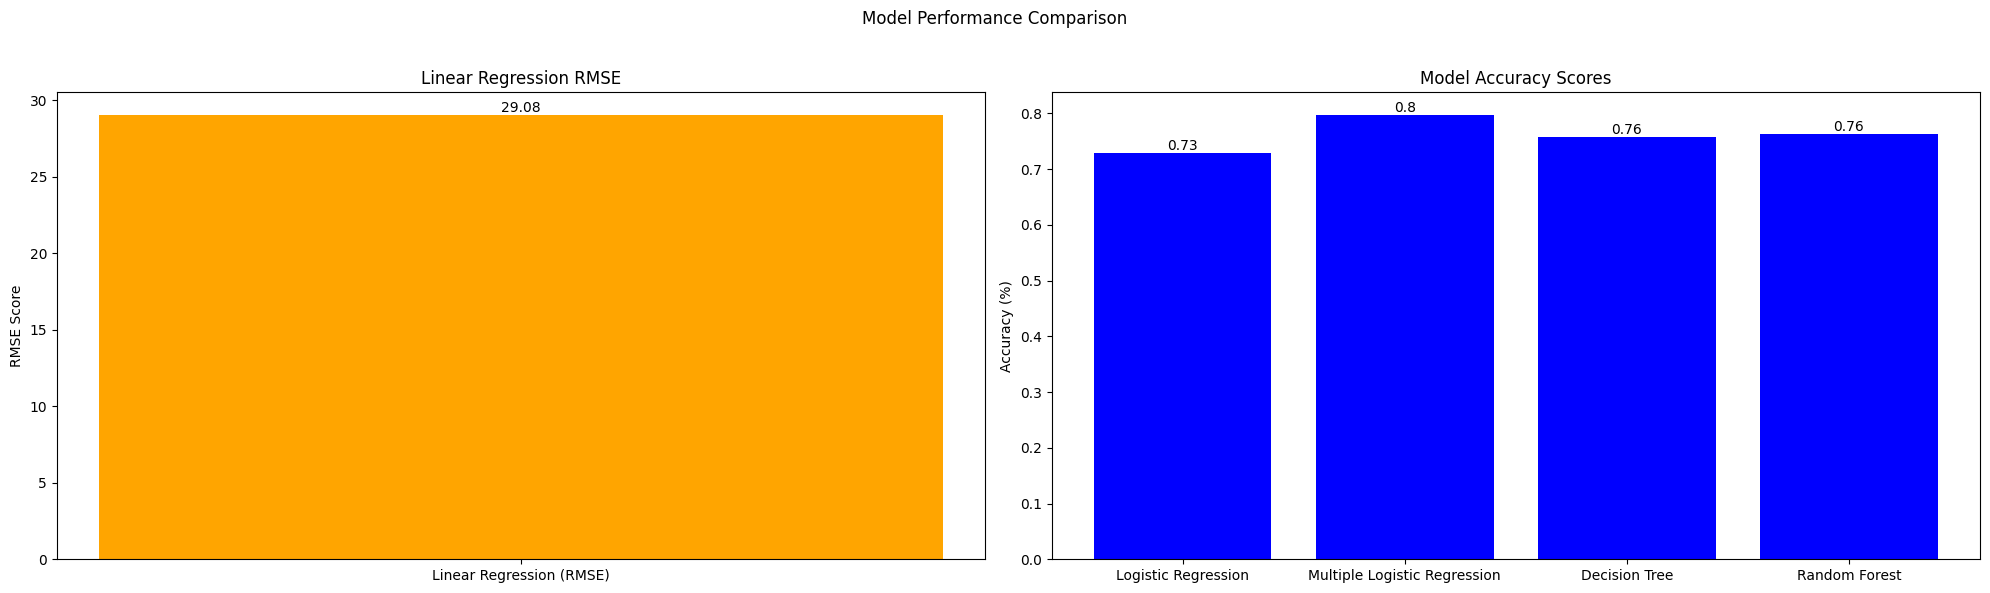

In [25]:
# Data for the plot
models_accuracy = ["Logistic Regression", "Multiple Logistic Regression", "Decision Tree", "Random Forest"]
accuracy_scores = [logistic_regression_accuracy, multiple_logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy]
rmse_score = rmse  # RMSE for Linear Regression

# Creating two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plotting RMSE in the first subplot
ax[0].bar(["Linear Regression (RMSE)"], [rmse_score], color='orange')
ax[0].set_title("Linear Regression RMSE")
ax[0].set_ylabel("RMSE Score")
for bar in ax[0].containers[0]:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plotting accuracy scores in the second subplot
bars = ax[1].bar(models_accuracy, accuracy_scores, color='blue')
ax[1].set_title("Model Accuracy Scores")
ax[1].set_ylabel("Accuracy (%)")
for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.suptitle("Model Performance Comparison")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Binary Classification on Customer Churn using Keras

Data Manipulation

In [26]:
# Display all columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
# Filter the DataFrame to get Male customers
sum(df['gender'] == "Male")

3555

In [28]:
# Filter the DataFrame to get DSL customers
sum(df['InternetService'] == 'DSL')

2421

In [29]:
# Filter the DataFrame to get female customers who are senior citizens and use 'Mailed check' as their payment method
female_customer = df[
    (df['gender'] == 'Female') &                 # Condition: Gender should be Female
    (df['SeniorCitizen'] == 1) &                 # Condition: Senior Citizen indicator should be 1 (assumes 1 means True)
    (df['PaymentMethod'] == 'Mailed check')      # Condition: Payment method should be 'Mailed check'
]

# Display the first few rows of the resulting DataFrame
female_customer.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [30]:
# Convert 'tenure' and 'TotalCharges' columns to numeric, forcing errors to NaN
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove rows where 'tenure' or 'TotalCharges' is NaN
df = df.dropna(subset=['tenure', 'TotalCharges'])

# Now filter for new customers
new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


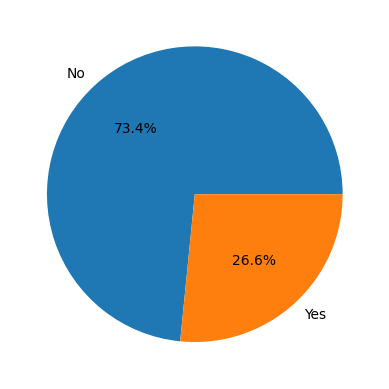

In [31]:
# Get the unique values from the 'Churn' column to use as labels for the pie chart
names = df["Churn"].value_counts().keys().tolist()

# Get the count of each unique value in the 'Churn' column to use as sizes for the pie chart
sizes = df["Churn"].value_counts().tolist() 

# Create a pie chart using the sizes and labels, with percentage display for each slice
plt.pie(
    sizes,                   # Sizes of each pie section, based on count of 'Churn' values
    labels=names,            # Labels for each section (e.g., 'Yes' or 'No' if 'Churn' is binary)
    autopct='%1.1f%%'        # Display percentage with 1 decimal place
)

# Show the pie chart
plt.show()


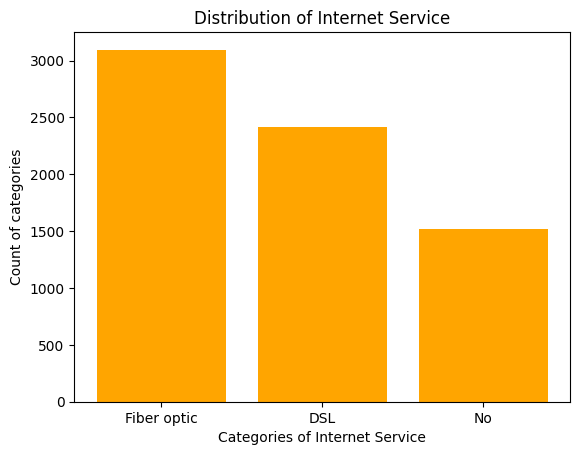

In [32]:
# Create a bar plot for the counts of each category in the 'InternetService' column
plt.bar(
    df['InternetService'].value_counts().keys().tolist(),  # Get unique categories as x-axis labels
    df['InternetService'].value_counts().tolist(),         # Get the count of each category as y-axis values
    color='orange'                                         # Set the color of the bars to orange
)

# Label the x-axis as 'Categories of Internet Service'
plt.xlabel('Categories of Internet Service')

# Label the y-axis as 'Count of categories'
plt.ylabel('Count of categories')

# Set the title of the plot as 'Distribution of Internet Service'
plt.title('Distribution of Internet Service')

# Display the bar plot
plt.show()


### Model Building

In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Churn' column  
df['Churn'] = le.fit_transform(df['Churn'])

# Display the first few rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [34]:
# Select the 'tenure' column as the feature variable X
X = df[['tenure']]

# Select the 'Churn' column as the target variable Y
Y = df[['Churn']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y,                   # Features and target
    test_size=0.20,         # 20% of the data will be used for testing
    random_state=50         # Set a random state for reproducibility
)


In [35]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Build the model
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))  # input_dim matches the feature count
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test))

2024-11-03 17:45:55.687051: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-03 17:45:55.737096: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 17:45:56.073763: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 17:45:56.075287: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-03 17:45:56.888265: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Epoch 1/150


2024-11-03 17:45:58.091760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-03 17:45:58.092674: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


176/176 [==============================] - 1s 1ms/step - loss: 0.5205 - accuracy: 0.7342 - val_loss: 0.4910 - val_accuracy: 0.7527
Epoch 2/150
176/176 [==============================] - 0s 691us/step - loss: 0.5174 - accuracy: 0.7460 - val_loss: 0.4926 - val_accuracy: 0.7697
Epoch 3/150
176/176 [==============================] - 0s 669us/step - loss: 0.5175 - accuracy: 0.7465 - val_loss: 0.4946 - val_accuracy: 0.7697
Epoch 4/150
176/176 [==============================] - 0s 684us/step - loss: 0.5206 - accuracy: 0.7470 - val_loss: 0.4950 - val_accuracy: 0.7697
Epoch 5/150
176/176 [==============================] - 0s 645us/step - loss: 0.5170 - accuracy: 0.7433 - val_loss: 0.4894 - val_accuracy: 0.7697
Epoch 6/150
176/176 [==============================] - 0s 681us/step - loss: 0.5182 - accuracy: 0.7520 - val_loss: 0.4915 - val_accuracy: 0.7527
Epoch 7/150
176/176 [==============================] - 0s 656us/step - loss: 0.5177 - accuracy: 0.7452 - val_loss: 0.4940 - val_accuracy: 0.7697

In [36]:
# Display the keys of the training history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

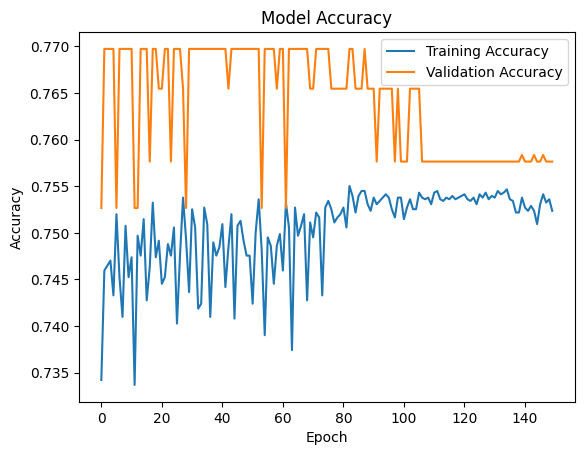

In [37]:
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [38]:
# Calculate the mean of the validation accuracy from the training history of the model
mean_val_accuracy = np.mean(model.history.history['val_accuracy'])

# Display the mean validation accuracy
mean_val_accuracy


0.7640085236231486

In [39]:
# Make predictions
y_pred_prob = model.predict(x_test)

# Convert probabilities to binary predictions using a threshold
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)  # Assuming binary classification

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy)

44/44 [==============================] - 0s 477us/step
Confusion Matrix:
 [[959 100]
 [241 107]]
Accuracy Score: 0.757640369580668


In [40]:
# Sequential Model Building with dropout

# Initialize a sequential model
model = Sequential()

# Add the first dense layer with 12 units and ReLU activation
model.add(Dense(12, activation='relu'))

# Add a dropout layer with a dropout rate of 20% to prevent overfitting
model.add(Dropout(0.2))

# Add the second dense layer with 8 units and ReLU activation
model.add(Dense(8, activation='relu'))

# Add a dropout layer with a dropout rate of 10%
model.add(Dropout(0.1))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 200 epochs, using validation data to evaluate performance
model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
176/176 [==============================] - 1s 1ms/step - loss: 3.0169 - accuracy: 0.5616 - val_loss: 0.9153 - val_accuracy: 0.7527
Epoch 2/200
176/176 [==============================] - 0s 756us/step - loss: 1.0727 - accuracy: 0.6704 - val_loss: 0.6146 - val_accuracy: 0.7527
Epoch 3/200
176/176 [==============================] - 0s 789us/step - loss: 0.7485 - accuracy: 0.6603 - val_loss: 0.4939 - val_accuracy: 0.7697
Epoch 4/200
176/176 [==============================] - 0s 748us/step - loss: 0.6562 - accuracy: 0.6827 - val_loss: 0.4915 - val_accuracy: 0.7527
Epoch 5/200
176/176 [==============================] - 0s 718us/step - loss: 0.6096 - accuracy: 0.7052 - val_loss: 0.4937 - val_accuracy: 0.7527
Epoch 6/200
176/176 [==============================] - 0s 680us/step - loss: 0.5813 - accuracy: 0.7212 - val_loss: 0.4959 - val_accuracy: 0.7527
Epoch 7/200
176/176 [==============================] - 0s 689us/step - loss: 0.5729 - accuracy: 0.7220 - val_loss: 0.4962 - val_accu

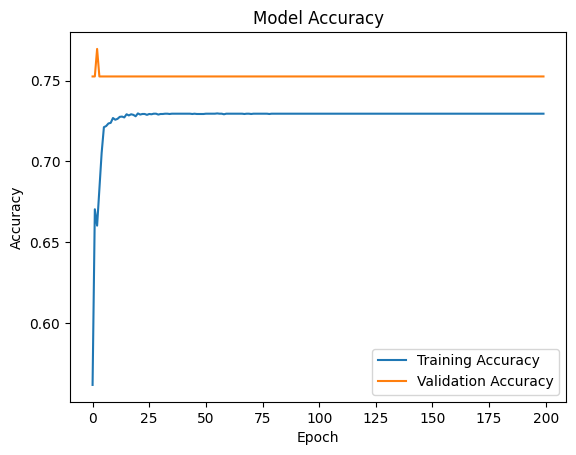

In [41]:
# Retrieve training accuracy from the model's history
model_train_accuracy = model.history.history['accuracy']

# Retrieve validation accuracy from the model's history
model_val_accuracy = model.history.history['val_accuracy']

# Plot the training accuracy
plt.plot(model_train_accuracy, label='Training Accuracy')

# Plot the validation accuracy
plt.plot(model_val_accuracy, label='Validation Accuracy')

# Set the title of the plot
plt.title('Model Accuracy')

# Label the y-axis
plt.ylabel('Accuracy')

# Label the x-axis
plt.xlabel('Epoch')

# Display a legend to differentiate between training and validation accuracy
plt.legend()

# Show the plot
plt.show()


In [42]:
# Generate predicted probabilities for the test set
y_pred_prob = model.predict(x_test)

# Define the threshold for classification
threshold = 0.5

# Convert predicted probabilities to binary predictions based on the threshold
y_pred = (y_pred_prob > threshold).astype(int)  # Assuming binary classification

# Build the confusion matrix to evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the accuracy score
print("Accuracy Score:", accuracy)


44/44 [==============================] - 0s 420us/step
Confusion Matrix:
 [[1059    0]
 [ 348    0]]
Accuracy Score: 0.7526652452025586


In [43]:
X =df[['MonthlyCharges','tenure','TotalCharges']] # Features
Y =df[['Churn']] # Target 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [44]:
# Initialize the Sequential model
model = Sequential()

# Add the first hidden layer with 12 neurons, ReLU activation, and input shape defined
model.add(Dense(12, input_dim=3, activation='relu'))

# Add the second hidden layer with 8 neurons and ReLU activation
model.add(Dense(8, activation='relu'))

# Add the output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data for 150 epochs
# Validation data is provided to monitor performance on unseen data
model.fit(X_train, y_train, epochs=250, validation_data=(X_test, y_test))

Epoch 1/250
154/154 [==============================] - 1s 1ms/step - loss: 4.8736 - accuracy: 0.6264 - val_loss: 0.7704 - val_accuracy: 0.7033
Epoch 2/250
154/154 [==============================] - 0s 779us/step - loss: 0.6823 - accuracy: 0.7241 - val_loss: 0.5059 - val_accuracy: 0.7678
Epoch 3/250
154/154 [==============================] - 0s 763us/step - loss: 0.6068 - accuracy: 0.7554 - val_loss: 0.5105 - val_accuracy: 0.7711
Epoch 4/250
154/154 [==============================] - 0s 755us/step - loss: 0.5694 - accuracy: 0.7580 - val_loss: 0.4916 - val_accuracy: 0.7744
Epoch 5/250
154/154 [==============================] - 0s 749us/step - loss: 0.5521 - accuracy: 0.7666 - val_loss: 0.6288 - val_accuracy: 0.7801
Epoch 6/250
154/154 [==============================] - 0s 745us/step - loss: 0.6912 - accuracy: 0.7434 - val_loss: 0.4777 - val_accuracy: 0.7678
Epoch 7/250
154/154 [==============================] - 0s 769us/step - loss: 0.6006 - accuracy: 0.7592 - val_loss: 0.5779 - val_accu

In [45]:
print(np.mean(model.history.history['accuracy']))
print(np.mean(model.history.history['val_accuracy']))

0.7672385222911835
0.7462445483207703


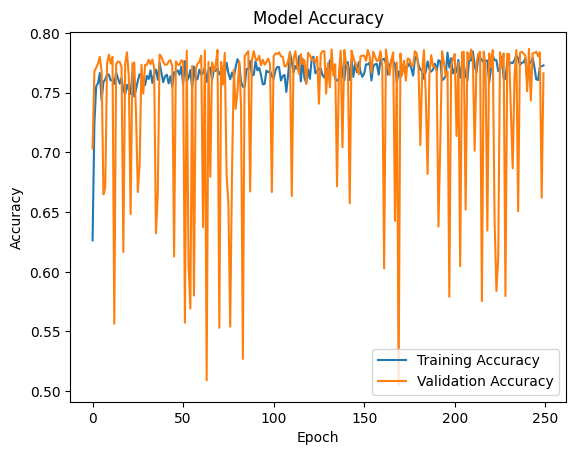

In [46]:
# Retrieve training accuracy from the model's history
model_train_accuracy = model.history.history['accuracy']

# Retrieve validation accuracy from the model's history
model_val_accuracy = model.history.history['val_accuracy']

# Plot the training accuracy
plt.plot(model_train_accuracy, label='Training Accuracy')

# Plot the validation accuracy
plt.plot(model_val_accuracy, label='Validation Accuracy')

# Set the title of the plot
plt.title('Model Accuracy')

# Label the y-axis
plt.ylabel('Accuracy')

# Label the x-axis
plt.xlabel('Epoch')

# Display a legend to differentiate between training and validation accuracy
plt.legend()

# Show the plot
plt.show()


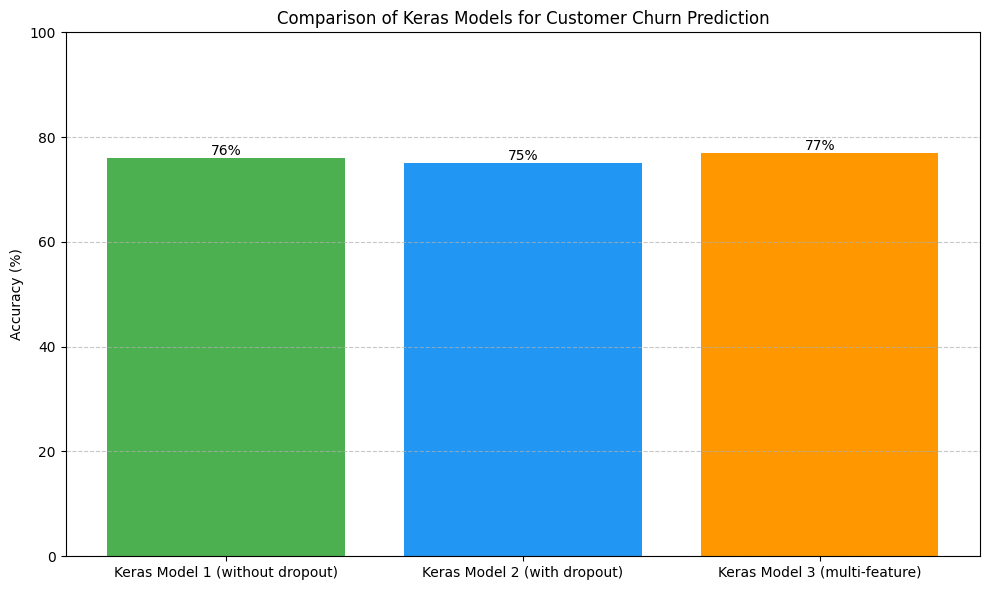

In [4]:
# Model names and their corresponding accuracies
models = [
    "Keras Model 1 (without dropout)",
    "Keras Model 2 (with dropout)",
    "Keras Model 3 (multi-feature)"
]

accuracies = [76, 75, 77]  # Corresponding accuracies

# Choose different colors for the bars
colors = ['#4CAF50', '#2196F3', '#FF9800']  # Green, Blue, Orange

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)

# Adding accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')

# Adding labels and title
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Keras Models for Customer Churn Prediction')
plt.ylim(0, 100)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()